# RNN Text: Tweet Classification
**OPIM 5509: Introduction to Deep Learning - University of Connecticut**

Full Name: Trisha Chatterjee <br>


-----------------------------------------------
For your assignment, you are provided with a function to scrape tweets of certain users on Twitter. Use the function to scrape 2000 tweets for any two people you are interested in. Then save these tweets to your own drive as text files with two folders.

The rubric is shown below. 

## Rubric
**Part I: Data Preparation ( 35 points)**
* (5 points) Write a few lines about the two people/organizations you are going to scrape. Why are they of interest to you? Why should they be of interest to me?
* (10 points) Use the function to scrape 2000 tweets from each person/organization and save to your drive.
* (5 points) Load the data from your drive. 
* (15 points) Tokenize, pad the sequences and split data to training and validation. 
    * Make a shareable link clearly displayed at the top of your script so we can review your data, otherwise, no credit for this section. 

**Part II: Modeling (45 points)**
* (30 points) Fit three models with different architectures of varying complexity. Please have nice organized headers so I can grade it easily. You can do:
  * LSTM, GRU or SimpleRNN
  * Bidirectional LSTM or GRU
  * 1D Conv and Pooling
  * Pre-loaded word embeddings (i.e. GLOVE)
  * All of the above with stacked layers etc.

* (15 points) For each model you built, make a confusion matrix with report (like this: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

**Tip:** You may get bad accuracy, also try to change the max length and most common words, this can make a difference sometimes. Do not worry about accuracy from the first model, just try to improve it in subsequent models. I am judging your code and logic not accuracy - it’s possible you can’t predict it!

**Part III: Analysis (20 points)**
* Write five to ten bullets to compare your results and discuss how you improve the models by changing the architectures.


# **Part I - Data Preperation**

##Write a few lines about the two people/organizations you are going to scrape. Why are they of interest to you? Why should they be of interest to me?

Timothy Donald Cook (Tim Cook) is the CEO of Apple and has been working there since the year 1998.

Elon Musk is the founder of SpaceX, product architect of Tesla Company, co - founder of Neuralink and one of the richest people in the world!

Apple's CEO Tim Cook said in an interview that he had a great admiration and respect for Tesla and that Apple plans to enter the Electric Vehicle market with it's own autonomous vehicle indicating that there may soon be a competetion among the major players of the tech industry to gain the lead!

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Installing snscrape to scrape tweets from the web
!pip install snscrape
import snscrape.modules.twitter as sntwitter #Scraping twitter data
import csv #Import csv module and store scraped tweets as csv file

##Use the function to scrape 2000 tweets from each person/organization and save to your drive.

 **Scraping Tweets of Tim Cook**

In [ ]:
# Specify a folder path to store scraped data
base_dir = '/content/drive/MyDrive/OPIM 5509 - Intro to Deep Learning/Module 5: Text Mining/Assignment 5.2'

import tensorflow as tf #Importing tensorflow to save data in the folder specified

#Creating a new directory/folder in google drive
tf.io.gfile.mkdir(base_dir)

#Combine the 2 strings and store Tim Cook's tweets in the folder named 'Tim'
tim_dir = base_dir + '/Tim/'

#Create the second directory
tf.io.gfile.mkdir(tim_dir)

In [ ]:
#Setting max tweet limit to 2000
maxTweets = 2000

# Scraping tweets of Tim Cook and limiting it to 2000, looping it using the for loop.
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@tim_cook + since:2010-12-02 until:2021-03-11-filter:links -filter:replies').get_items()):
  csvFile = open(tim_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

#Breaking the loop if the scraped tweet count exceeds 2000
  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
  
csvFile.close() #Closing the pointer to csv file.

**Scraping Tweets of Elon Musk**

In [ ]:
# Specify a folder path to store scraped data
base_dir = '/content/drive/MyDrive/OPIM 5509 - Intro to Deep Learning/Module 5: Text Mining/Assignment 5.2'

import tensorflow as tf #Importing tensorflow to save data in the folder specified

#Creating a new directory/folder in google drive
tf.io.gfile.mkdir(base_dir)

#Combine the 2 strings and store Tim Cook's tweets in the folder named 'Elon'
elon_dir = base_dir + '/Elon/'

#Create the second directory
tf.io.gfile.mkdir(elon_dir)

In [ ]:
#Setting max tweet limit to 2000
maxTweets = 2000

# Scraping tweets of Tim Cook and limiting it to 2000, looping it using the for loop.
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@elonmusk + since:2010-12-02 until:2021-03-11-filter:links -filter:replies').get_items()):
  csvFile = open(elon_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

#Breaking the loop if the scraped tweet count exceeds 2000
  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close() #Closing the pointer to csv file.

##Load the data from your drive.

In [ ]:
#Loading the scraped data which is saved on drive.
import os

my_dir = base_dir #Redirecting to the path in drive

labels = []
texts = []
count = 0 
for label_type in ['Tim/', 'Elon/']: #Using a for loop to scrape from the two folders Tim and Elon
    dir_name = os.path.join(my_dir, label_type)
    for fname in os.listdir(dir_name): #Looping through the scraped data in csv file
        if fname[-4:] == '.csv':
            count = count + 1 #Incrementing the count in every loop and viewing for reference
            print(count)
            f = open(os.path.join(dir_name, fname)) #Opening the file
            texts.append(f.read())
            f.close() #Close the file
            if label_type == 'Tim/': #Appending 0 if the file is from Tim's folder or a 1 if the file is from 'Elon's' folder
                labels.append(0)
            else:
                labels.append(1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


##Tokenize, pad the sequences and split data to training and validation

In [ ]:
# Tokenize, pad and prepare training and validation data
#Import the required modules
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

#Specifying maximum length to be 200
maxlen = 200 # or 200

#Using 1000  samples for validation
validation_samples = 1000  # We will be validating on 1000 samples
max_words = 10000  # We will consider only the top 1000 words in the dataset

tokenizer = Tokenizer(num_words=max_words) # run the tokenizer

# this learns the indices of the words using fit_on_texts
tokenizer.fit_on_texts(texts)

# these are the sequences which comprise the indices from above
sequences = tokenizer.texts_to_sequences(texts)

#Displaying number of unique tokens
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

#Pad sequences which have low word counts to maintain uniform length
data = pad_sequences(sequences, maxlen=maxlen)

#Converting labels stored as a list to a numpy array for further modeling
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape) #Print data shape
print('Shape of label tensor:', labels.shape) #Print label shape

Found 13585 unique tokens.
Shape of data tensor: (3106, 200)
Shape of label tensor: (3106,)


In [ ]:
#Setting up an array for training sample
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices] #Secifying variable data to store an array of indices
labels = labels[indices] #Specifying label data to store the labels 

training_samples = 2000  # Training the data on 2000 samples.

#Specifying training and validation samples for split
x_train = data[:training_samples] # from 0 to training samples
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
#Printing validation and train samples data size
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2000, 200) (2000,)
(1000, 200) (1000,)


## Link to scraped tweets 

https://drive.google.com/drive/folders/1sqfgBhW22_856_fmEFZ47Zxvjn4JibFU?usp=sharing

# **Part II-Modeling**

##Fit three models with different architectures of varying complexity.

## **Model 1- Fitting an LSTM model with Early Stopping** 

In [ ]:
#Import the required modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Create the LSTM model with early stopping
#Import required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM

#create LSTM model
model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen)) #Creating the input layer and passing the words to the model
model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1)) #Specified a dropout value of 0.1, and having 64 nodes
model.add(Dense(32, activation='relu')) #Hidden layer having 32 nodes
model.add(Dense(16, activation='relu')) #Hidden layer having 16 nodes
model.add(Dense(1, activation='sigmoid')) #Output layer with sigmoid as the activation function
model.summary() #View model summary

#Implementing early stopping
es = EarlyStopping(monitor='val_acc', 
                   mode='max', 
                   patience=10,  
                   verbose=1,
                   restore_best_weights=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 8)            80000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                18688     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 101,313
Trainable params: 101,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compiling the model 
model.compile(optimizer='adam', #Using adam as the optimizer
              loss='binary_crossentropy', #Using binary cross entropy as the loss
              metrics=['acc'])

history = model.fit(x_train, y_train, #Fitting model on X and Y
                    epochs=10, #Specifying number of epochs as 10
                    batch_size=10, #Specifying batch size of 10
                    validation_data=(x_val, y_val)) 

Epoch 1/20
200/200 [==============================] - 34s 159ms/step - loss: 0.5527 - acc: 0.7153 - val_loss: 0.1563 - val_acc: 0.9500
Epoch 2/20
200/200 [==============================] - 32s 159ms/step - loss: 0.0919 - acc: 0.9729 - val_loss: 0.1283 - val_acc: 0.9590
Epoch 3/20
200/200 [==============================] - 32s 162ms/step - loss: 0.0306 - acc: 0.9912 - val_loss: 0.1231 - val_acc: 0.9620
Epoch 4/20
200/200 [==============================] - 32s 160ms/step - loss: 0.0156 - acc: 0.9941 - val_loss: 0.1329 - val_acc: 0.9680
Epoch 5/20
200/200 [==============================] - 32s 160ms/step - loss: 0.0050 - acc: 0.9990 - val_loss: 0.1588 - val_acc: 0.9630
Epoch 6/20
200/200 [==============================] - 32s 162ms/step - loss: 0.0031 - acc: 0.9994 - val_loss: 0.1758 - val_acc: 0.9640
Epoch 7/20
200/200 [==============================] - 32s 159ms/step - loss: 5.9140e-04 - acc: 1.0000 - val_loss: 0.1978 - val_acc: 0.9640
Epoch 8/20
200/200 [==============================]

 **Model Accuracy and Loss**

In [ ]:
#Viewing the dictionary keys of the model complied for plotting accuracy
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

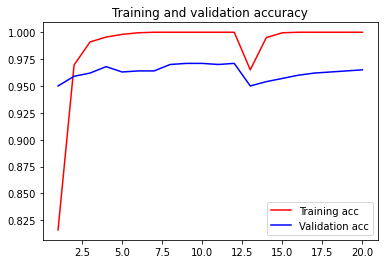

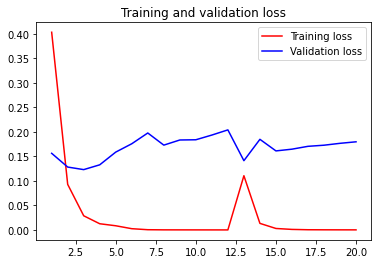

In [ ]:
#Import the required modules
import matplotlib.pyplot as plt

#Specifying variables to Plot Training and validation accuracy and Training and validation loss.
acc = history.history['acc'] 
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Plotting training accurary in red line
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') #Plotting validation accuracy in blue line
plt.title('Training and validation accuracy') #plot title
plt.legend() #displaying legend

plt.figure()

#Plot training loss in red line
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') #Plot validation loss in blue line
plt.title('Training and validation loss') #plot title
plt.legend() #displaying legend on the plot.

plt.show() #display the plots

 **Fetching the Classification Report and Confusion Matrix**


In [ ]:
# Improt modules for classification report and confusion matrix
from sklearn.metrics import confusion_matrix

# Rounding the values to a whole number 0 or 1
preds = np.round(model.predict(x_val),0)
preds[0]

array([1.], dtype=float32)

In [ ]:
# confusion matrix
testpreds = (model.predict(x_val)>0.5) 
matrix = confusion_matrix(y_val, testpreds) #Construct the confusion matrix
 
matrix #view the confusion matrix

array([[324,  22],
       [ 13, 641]])

In [ ]:
# Import modules for classification report 
from sklearn.metrics import classification_report

# View the classification report
print(classification_report(y_val, testpreds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       346
           1       0.97      0.98      0.97       654

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



The model accuracy of LSTM with early stopping is 96%

## **Model 2 - Fitting a GRU model with Early Stopping**

In [ ]:
#Import the required modules
from tensorflow.keras.layers import GRU

#Creating the GRU model
model = Sequential()
model.add(Embedding(max_words, 50, input_length=maxlen)) #Creating the input layer and passing the words to the model
model.add(GRU(64, dropout=0.1, recurrent_dropout=0.1)) #Specified a dropout value of 0.1, and having 64 nodes
model.add(Dense(32, activation='relu')) #Hidden layer having 32 nodes
model.add(Dense(16, activation='relu')) #Hidden layer having 16 nodes
model.add(Dense(1, activation='sigmoid')) #Output layer with sigmoid as the activation function
model.summary()

#Implementing early stopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=20, 
                   verbose=1,
                   restore_best_weights=True)

#Compiling the model 
model.compile(optimizer='rmsprop', #Using rmsprop as the optimizer
              loss='binary_crossentropy', #Using binary cross entropy as the loss
              metrics=['acc'])

history = model.fit(x_train, y_train, #Fitting model on X and Y
                    epochs=15, #Specifying number of epochs as 15
                    batch_size=100, #Specifying batch size of 100
                    validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 50)           500000    
_________________________________________________________________
gru (GRU)                    (None, 64)                22272     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 524,897
Trainable params: 524,897
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
20/20 [==============================] - 9s 340ms/step - loss: 0.6565 - acc: 0.6199 - val_loss: 0.4605 

 **Plotting Model Accuracy and Loss**

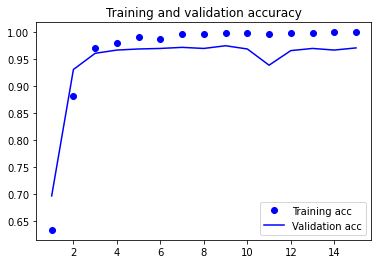

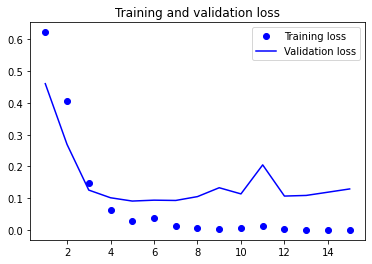

In [ ]:
#Viewing the dictionary keys of the model complied for plotting accuracy
import matplotlib.pyplot as plt

#Specifying variables to Plot Training and validation accuracy and Training and validation loss.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Plotting training accurary in dotted blue line
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') #Plotting validation accuracy in blue line
plt.title('Training and validation accuracy') #plot title
plt.legend()

plt.figure()

#Plotting training accuracy in dotted blue line
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') #Plotting validation accuracy in blue line
plt.title('Training and validation loss') #plot title
plt.legend()

plt.show() #Displaying the plots

 **Fetching the Classification Report and Confusion Matrix**

In [ ]:
# Improt modules for classification report and confusion matrix
from sklearn.metrics import confusion_matrix

# Rounding the values to a whole number 0 or 1
preds1 = np.round(model.predict(x_val),0)
preds1[0]

array([1.], dtype=float32)

In [ ]:
# confusion matrix 
testpreds = (model.predict(x_val)>0.5)
matrix = confusion_matrix(y_val, testpreds) #Construct the confusion matrix

matrix  #view the confusion matrix

array([[324,  22],
       [  7, 647]])

In [ ]:
# Import modules for classification report 
from sklearn.metrics import classification_report

# View the classification report
print(classification_report(y_val, testpreds))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       346
           1       0.97      0.99      0.98       654

    accuracy                           0.97      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.97      0.97      0.97      1000



## **Model 3- Fitting a model with Convolution and Max Pooling**

In [ ]:
#Import modules
from tensorflow.keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout, Bidirectional, Conv1D, MaxPool1D

#Creating the model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=maxlen)) #Creating the input layer and passing the words to the model
model.add(Conv1D(6, kernel_size=2, input_shape=(6, 18))) # First convolutional layer with kernel size 2
model.add(MaxPool1D(2)) #Maxpooling on conv layer 1
model.add(layers.Flatten()) #Flattening the layer
model.add(Dense(4, activation='relu')) #Hidden layer with 4 nodes
model.add(Dense(1, activation='sigmoid')) #Output layer with activation function as sigmoid
model.summary()

#Compiling the model
model.compile(optimizer='rmsprop', #Using rmsprop as the optimizer
              loss='binary_crossentropy', #Using binary cross entropy as the loss
              metrics=['acc'])

#Fitting the model on train and validation data
history = model.fit(x_train, y_train,
                    epochs=20, #Specifying number of epochs as 20
                    batch_size=100, #Batch size as 100
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 64)           640000    
_________________________________________________________________
conv1d (Conv1D)              (None, 199, 6)            774       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 99, 6)             0         
_________________________________________________________________
flatten (Flatten)            (None, 594)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 2380      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 643,159
Trainable params: 643,159
Non-trainable params: 0
________________________________________________

**Plotting Model Accuracy and Loss**

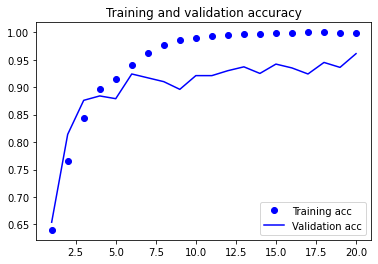

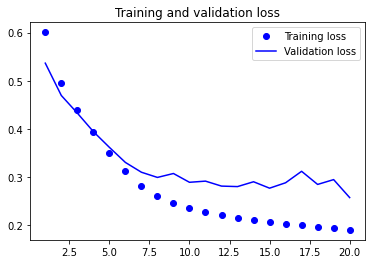

In [ ]:
#Viewing the dictionary keys of the model complied for plotting accuracy
import matplotlib.pyplot as plt

#Specifying variables to Plot Training and validation accuracy and Training and validation loss.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Plotting training accurary in dotted blue line
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') #Plotting validation accuracy in blue line
plt.title('Training and validation accuracy') #plot title
plt.legend()

plt.figure()

#Plotting training accurary in dotted blue line
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') #Plotting validation accuracy in blue line
plt.title('Training and validation loss') #plot title
plt.legend()

plt.show() #Viewing the plots

**Fetching Classification Report and Confusion Matrix**

In [ ]:
# Improt modules for classification report and confusion matrix
from sklearn.metrics import confusion_matrix

# Rounding the values to a whole number 0 or 1
preds = np.round(model.predict(x_val),0)
preds[0]

array([1.], dtype=float32)

In [ ]:
# confusion matrix
testpreds = (model.predict(x_val)>0.5)
matrix = confusion_matrix(y_val, testpreds)

matrix #view the confusion matrix

array([[309,  37],
       [  2, 652]])

In [ ]:
# Import modules for classification report 
from sklearn.metrics import classification_report

# View the classification report
print(classification_report(y_val, testpreds))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       346
           1       0.95      1.00      0.97       654

    accuracy                           0.96      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.96      0.96      0.96      1000



# **Part III - Analysis**

**Model 1**
* The model accuracy obtained from model 1 - LSTM with early stopping is 96%. 
* The model preformance dropped when the number of epochs was increased to 20, the model reached the optimal performance level when the number of epochs was set to 10.

**Model 2**
* The model accuracy obtained from model 2 - GRU with early stopping gave us an accuracy of 97%. 
* The model performance showed it's peak when the number of epochs was set to 20.

**Model 3**
* The model accuracy obtained from model 3 - Convolution and max pooling is 96%.
* The model performance showed the maximum accuracy in 20 epochs.
* The confusion matrix showed a 94% accuracy of 0(No) and 97% accuracy of 1(Yes)

##**Displaying the top 100 words used by Tim Cook and Elon Musk**

In [ ]:
labels_ = []
texts_ = []
count = 0
for label_type in ['Tim/', 'Elon/']: #Using a for loop to scrape from the two folders Tim and Elon
    dir_name = os.path.join(my_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.csv': #Looping through the scraped data in csv file
            count = count + 1 #Incrementing the count in every loop
            f = open(os.path.join(dir_name, fname))
            texts_.append(f.read()) #Opening the file
            f.close()
            if label_type == 'Tim/': #Appending 0 if the file is from Tim's folder or a 1 if the file is from 'Elon's' folder
                labels_.append('Tim')
            else:
                labels_.append('Elon')

In [ ]:
#Importing modules required
import pandas as pd
dic={'Label':labels_,'Text':texts_} #Specifying key value pair to store labels and texts
df=pd.DataFrame(dic)
df_tim=df[df.Label=='Tim'] #Storing Tim's tweets in a data frame
df_elon=df[df.Label=='Elon'] #Storing Elon's tweets in a data frame

In [ ]:
b=pd.Series(' '.join(df_tim.Text).split()).value_counts()[:100] #Fetching 100 of Tim's tweets
a=pd.Series(' '.join(df_elon.Text).split()).value_counts()[:100] #Fetching 100 of Elon's tweets

In [ ]:
a_=pd.DataFrame(a,columns=['Tim']) #Storing the fetched data in a for Tim
b_=pd.DataFrame(b,columns=['Elon']) #Storing the fetched data in b for Elon

In [ ]:
#Viewing the nuber of values
c=pd.concat([a_,b_],axis=1,join='outer',ignore_index=False)
c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, id,date,tweet to community
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tim     100 non-null    float64
 1   Elon    100 non-null    float64
dtypes: float64(2)
memory usage: 3.4+ KB


In [ ]:
# Viewing Tim's Commom words
a_

,Tim
"id,date,tweet",2002
to,598
the,549
of,416
a,410
...,...
AI,24
Boring,23
work,23
they,23


In [ ]:
#Viewing Elon's Common Words
b_

,Elon
the,1179
"id,date,tweet",1104
to,1079
and,960
of,624
...,...
across,29
first,29
Our,29
best,29


 **Displaying the top 100 words for Tim and Elon's tweets after text cleaning**

**Converting Text to Lower Case**

In [ ]:
#Convert text to lower case for Tim's tweets
df_tim['Text'] = df_tim['Text'].str.lower()
df_tim.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Label,Text
0,Tim,"id,date,tweet\n1368966295975198720,2021-03-08 ..."
1,Tim,"id,date,tweet\n1366801098585956353,2021-03-02 ..."
2,Tim,"id,date,tweet\n1365443505204596736,2021-02-26 ..."
3,Tim,"id,date,tweet\n1364971361370738688,2021-02-25 ..."
4,Tim,"id,date,tweet\n1364578504809926658,2021-02-24 ..."


In [ ]:
# Convert text to lower case for Elon's tweets
df_elon['Text'] = df_elon['Text'].str.lower()
df_elon.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Label,Text
1104,Elon,"id,date,tweet\n1368915472142401540,2021-03-08 ..."
1105,Elon,"id,date,tweet\n1368867769211514881,2021-03-08 ..."
1106,Elon,"id,date,tweet\n1368693859203436548,2021-03-07 ..."
1107,Elon,"id,date,tweet\n1368329387733512193,2021-03-06 ..."
1108,Elon,"id,date,tweet\n1368058884837928970,2021-03-06 ..."


## **Removing Funky Characters from tweets and analyzing**

In [ ]:
# remove any funky characters with a blank for Tim's tweets
df_tim['Text'] = df_tim['Text'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip() #Replacing with a blank
df_tim.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Label,Text
0,Tim,iddatetweet what a perfect way to kick off int...
1,Tim,iddatetweet thanks to important insights from ...
2,Tim,iddatetweet were so happy to welcome our custo...
3,Tim,iddatetweet the best gift we can give young pe...
4,Tim,iddatetweet celebrating steve on what would ha...


In [ ]:
# remove any funky characters with a blank for Elon's tweets
df_elon['Text'] = df_elon['Text'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip() #Replacing with a blank
df_elon.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Label,Text
1104,Elon,iddatetweet starbase texas httpstcomtipqqmjf
1105,Elon,iddatetweet carnot efficiency of the universe
1106,Elon,iddatetweet great band too bad they broke up h...
1107,Elon,iddatetweet due to high levels of demand for f...
1108,Elon,iddatetweet doge spelled backwards is egod


 ## **Removing Stop Words from the tweets**

In [ ]:
#Import modules to remove stop words
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords') # this makes sure these are downloaded
print(stopwords.words('english'))

stop = stopwords.words('english') # Viewing stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
# remove the stop words
# apply these stopwords to the data
# link: https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe/43407993

# ' '. adds nice space 
df_tim.head() # the stop words have been removed
df_tim['Text'] = df_tim['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
df_tim.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Label,Text
0,Tim,iddatetweet perfect way kick internationalwome...
1,Tim,iddatetweet thanks important insights apple he...
2,Tim,iddatetweet happy welcome customers korea appl...
3,Tim,iddatetweet best gift give young people empowe...
4,Tim,iddatetweet celebrating steve would th birthda...


In [ ]:
# remove the stop words
# apply these stopwords to the data
# link: https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe/43407993

# ' '. adds a nice space 
df_elon.head() #  the stop words have been removed
df_elon['Text'] = df_elon['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
df_elon.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Label,Text
1104,Elon,iddatetweet starbase texas httpstcomtipqqmjf
1105,Elon,iddatetweet carnot efficiency universe
1106,Elon,iddatetweet great band bad broke httpstcovqmhhhwm
1107,Elon,iddatetweet due high levels demand fsd beta ad...
1108,Elon,iddatetweet doge spelled backwards egod


In [ ]:
#Viewing 20 top used words after removing stop words
myTable = df_tim['Text'].str.split(expand=True).stack().value_counts()
myTable[0:20] 

iddatetweet    1104
apple           285
world           170
us              158
everyone        128
today           127
new             124
thanks          112
great           105
thank            99
work             95
around           95
day              87
proud            86
team             79
happy            75
iphone           69
amp              69
see              63
one              62
dtype: int64

In [ ]:

# Create a frequency plot by converting to pandas DataFrame for easy plotting
x = df_tim['Text'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)

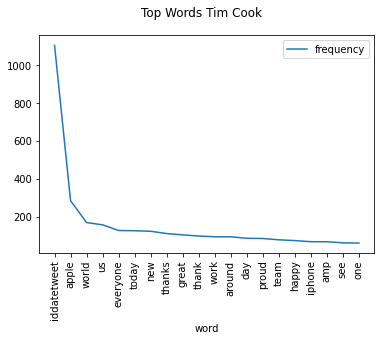

In [ ]:
# Frequency Distribution Plot
# look at first X words

# len(x) just the number of rows

x = x[0:20] # plotting top 20 words
            
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words Tim Cook')
plt.show()


In [ ]:
#Viewing 20 top used words after removing stop words
myTable = df_elon['Text'].str.split(expand=True).stack().value_counts()
myTable[0:20] # too cool! 

iddatetweet    2002
tesla           341
amp             272
model           117
spacex           83
falcon           69
car              69
good             66
launch           64
great            57
rocket           54
starship         53
new              52
first            50
boring           50
cars             48
like             46
time             46
soon             44
coming           43
dtype: int64

In [ ]:
# Create a frequency plot by converting to pandas DataFrame for easy plotting
y = df_elon['Text'].str.split(expand=True).stack().value_counts()
y = pd.DataFrame(y)
# reset the index
y.reset_index(inplace=True)
# rename the columns
y.rename(columns={y.columns[0]:'word', y.columns[1]:'frequency'}, inplace=True)

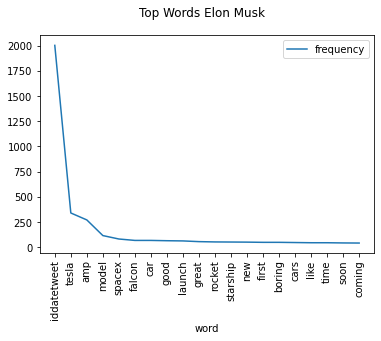

In [ ]:
# Frequency Distribution Plot
# look at first X words

# len(x) just the number of rows

y = y[0:20] #Plotting top 20 words
            
y.plot(x='word', y='frequency')
plt.xticks(np.arange(len(y)), y['word'], rotation=90)
plt.suptitle('Top Words Elon Musk')
plt.show()

## **Word Cloud**

**Tim Cook**

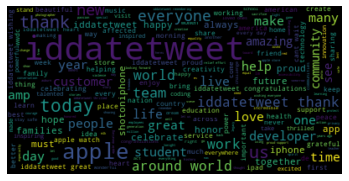

In [ ]:
# https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py

from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df_tim['Text']))

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df_tim['Text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

 **Elon Musk**

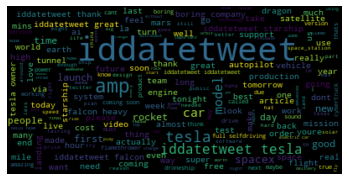

In [ ]:
# https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py

from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df_elon['Text']))

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df_elon['Text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The top 20 words used by Elon Musk in his tweets are - 

            tesla           341
            amp             272
            model           117
            spacex           83
            falcon           69
            car              69
            good             66
            launch           64
            great            57
            rocket           54
            starship         53
            new              52
            first            50
            boring           50
            cars             48
            like             46
            time             46
            soon             44
            coming           43

The top 20 words used by Tim Cook in his tweets are - 

            apple           285
            world           170
            us              158
            everyone        128
            today           127
            new             124
            thanks          112
            great           105
            thank            99
            work             95
            around           95
            day              87
            proud            86
            team             79
            happy            75
            iphone           69
            amp              69
            see              63
            one              62